<center><h2> Python End to End Case Study

In [18]:
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime as dt


In [2]:
cust=pd.read_csv('CUSTOMERS.csv')
loca=pd.read_csv('GEO_LOCATION.csv')
order_items=pd.read_csv('ORDER_ITEMS.csv')
ord_pay=pd.read_csv('ORDER_PAYMENTS.csv')
ord_rat=pd.read_csv('ORDER_REVIEW_RATINGS.csv')
orders=pd.read_csv('ORDERS.csv')
prod=pd.read_csv('PRODUCTS.csv')
sellers=pd.read_csv('SELLERS.csv')

In [3]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
loca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [5]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [6]:
ord_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [7]:
ord_rat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [9]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [59]:
cust_order = pd.merge(left=cust, right=orders, on='customer_id', how='inner')
cust_order

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00


In [60]:
cust_order_items = pd.merge(left=cust_order, right=order_items, on='order_id', how='inner')
cust_order_items

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:00,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:00,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:00,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:00,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:00,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:00,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:00,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:00,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:00,689.00,22.07


In [61]:
cust_order_payments = pd.merge(left=cust_order, right=ord_pay, on='order_id', how='inner')
cust_order_payments

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,1,credit_card,8,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,1,credit_card,6,88.78
103882,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,1,credit_card,3,129.06
103883,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,1,credit_card,5,56.04
103884,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,1,credit_card,2,711.07


<h3><font color='navy blue'><u>Detailed exploratory analysis

<b><i>High level metrics

In [10]:
print('Total Repayment =',ord_pay.payment_value.sum())
print('Total Quantity =',prod.product_photos_qty.count())
print('Total Categories =',prod.product_category_name.count())
print('Total Products =',prod.product_id.nunique())
print('Total sellers =',sellers.seller_id.nunique())
print('Total Locations =',loca.geolocation_state.nunique())
print('Total Payment Methods =',ord_pay.payment_type.nunique())

Total Repayment = 16008872.12
Total Quantity = 32341
Total Categories = 32328
Total Products = 32951
Total sellers = 3095
Total Locations = 20
Total Payment Methods = 5


<b><i>Understanding how many new customers acquired every month

In [15]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [17]:
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])

In [42]:
df1 = orders[['order_purchase_timestamp','customer_id']]
df1['Month'] = df1['order_purchase_timestamp'].dt.month_name(locale = 'English')
df1['Year'] = df1['order_purchase_timestamp'].dt.year
df1

C:\Users\VVLG\AppData\Local\Temp/ipykernel_6452/1343565266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = df1['order_purchase_timestamp'].dt.month_name(locale = 'English')
C:\Users\VVLG\AppData\Local\Temp/ipykernel_6452/1343565266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = df1['order_purchase_timestamp'].dt.year


,order_purchase_timestamp,customer_id,Month,Year
0,2017-10-02 10:56:00,9ef432eb6251297304e76186b10a928d,October,2017
1,2018-07-24 20:41:00,b0830fb4747a6c6d20dea0b8c802d7ef,July,2018
2,2018-08-08 08:38:00,41ce2a54c0b03bf3443c3d931a367089,August,2018
3,2017-11-18 19:28:00,f88197465ea7920adcdbec7375364d82,November,2017
4,2018-02-13 21:18:00,8ab97904e6daea8866dbdbc4fb7aad2c,February,2018
...,...,...,...,...
99436,2017-03-09 09:54:00,39bd1228ee8140590ac3aca26f2dfe00,March,2017
99437,2018-02-06 12:58:00,1fca14ff2861355f6e5f14306ff977a7,February,2018
99438,2017-08-27 14:46:00,1aa71eb042121263aafbe80c1b562c9c,August,2017
99439,2018-01-08 21:28:00,b331b74b18dc79bcdf6532d51e1637c1,January,2018


In [45]:
df3=df1.groupby(['Year','Month'])['customer_id'].count()
df3=df3.drop_duplicates(keep='first')
df3.shape

(24,)

In [48]:
df3=pd.DataFrame(df3)

In [49]:
df3

customer_id
Year Month                 
2016 December             1
     October            324
     September            4
2017 April             2404
     August            4331
     December          5673
     February          1780
     January            800
     July              4026
     June              3245
     March             2682
     May               3700
     November          7544
     October           4631
     September         4285
2018 April             6939
     August            6512
     February          6728
     January           7269
     July              6292
     June              6167
     March             7211
     May               6873
     September           16

<AxesSubplot:xlabel='Month'>

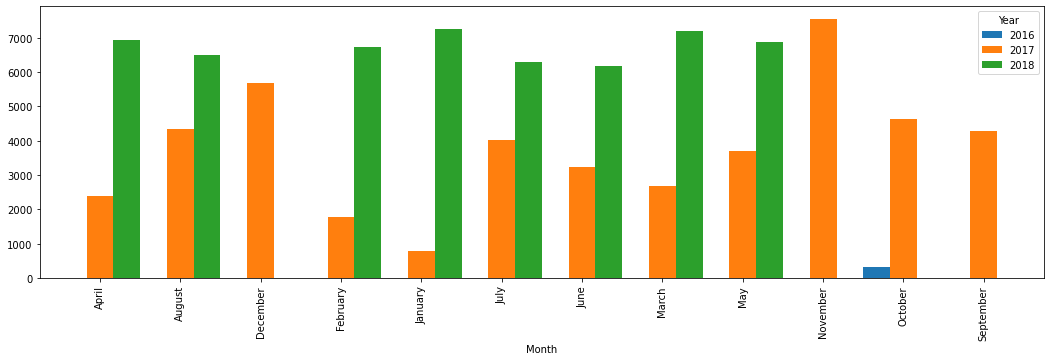

In [55]:
df3_pivot = pd.pivot_table(data=df1,values='customer_id',index='Month',columns='Year',aggfunc='count')
df3_pivot.plot(kind='bar',figsize=(18,5),width=1)

### d. How the revenues from existing/new customers on month on month basis

#### For existing customers

In [64]:
cust_order_payments

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,1,credit_card,8,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,1,credit_card,6,88.78
103882,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,1,credit_card,3,129.06
103883,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,1,credit_card,5,56.04
103884,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,1,credit_card,2,711.07


In [63]:
exist_df = cust_order_payments["customer_id"].duplicated(keep='first')
exist_cust_df = cust_order_payments[exist_df].reset_index(drop=True)
exist_cust_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,Akkarampalle,Andhra Pradesh,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:00,5/13/2017 11:55,5/15/2017 15:30,6/7/2017 12:02,5/30/2017 0:00,1,credit_card,1,67.98
1,469634941c27cd844170935a3cf60b95,ef07ba9aa5226f77264ffa5762b2280b,81750,Anakapalle,Andhra Pradesh,a9119eb77d6200811953803a7b6539e1,delivered,2018-03-12 13:07:00,3/12/2018 13:15,3/13/2018 22:12,3/22/2018 18:28,3/29/2018 0:00,1,credit_card,1,0.81
2,8247b5583327ab8be19f96e1fb82f77b,d85547cd859833520b311b4458a14c1c,23970,Dasnapur,Andhra Pradesh,a6917b5d71e0e9bc434e9228db8daeb2,delivered,2017-06-09 15:46:00,6/10/2017 15:42,6/12/2017 17:10,6/19/2017 19:32,7/4/2017 0:00,1,voucher,1,309.98
3,a02f66c3af7b16eec19ddcd98b645fe3,b3548d0cec408ae13d143bb4eeebaa6c,13323,Farooqnagar,Andhra Pradesh,db97652cf517d2cd03db63dec489ca62,delivered,2017-10-01 08:57:00,10/1/2017 9:14,10/2/2017 19:32,10/3/2017 14:23,10/18/2017 0:00,3,voucher,1,7.15
4,a02f66c3af7b16eec19ddcd98b645fe3,b3548d0cec408ae13d143bb4eeebaa6c,13323,Farooqnagar,Andhra Pradesh,db97652cf517d2cd03db63dec489ca62,delivered,2017-10-01 08:57:00,10/1/2017 9:14,10/2/2017 19:32,10/3/2017 14:23,10/18/2017 0:00,1,voucher,1,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,30c96385d694acb8aa2dc0df1770120b,b96d6a178adbabf269fd843b37327798,26112,Ramagundam,Andhra Pradesh,357b4b724bbf34f1d64b1c5dfdc88120,delivered,2018-01-24 02:22:00,1/24/2018 15:57,1/26/2018 21:28,2/7/2018 17:42,2/22/2018 0:00,2,voucher,1,1.51
4442,935993f47af1ed7d0715c26b686341c5,4452b8ef472646c4cc042cb31a291f3b,12236,Bobbili,Andhra Pradesh,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25 00:31:00,11/25/2017 2:33,11/27/2017 18:24,12/4/2017 21:13,12/20/2017 0:00,3,voucher,1,1.78
4443,935993f47af1ed7d0715c26b686341c5,4452b8ef472646c4cc042cb31a291f3b,12236,Bobbili,Andhra Pradesh,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25 00:31:00,11/25/2017 2:33,11/27/2017 18:24,12/4/2017 21:13,12/20/2017 0:00,1,voucher,1,20.00
4444,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,Jalda,Orissa,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:00,11/14/2017 12:15,11/27/2017 20:44,12/19/2017 19:37,12/12/2017 0:00,2,credit_card,1,32.13


In [66]:
exist_cust_df['order_purchase_timestamp'] = pd.to_datetime(exist_cust_df['order_purchase_timestamp'])

In [67]:
exist_cust_df['Month'] = exist_cust_df['order_purchase_timestamp'].dt.month_name(locale = 'English')
exist_cust_df['Year'] = exist_cust_df['order_purchase_timestamp'].dt.year
exist_cust_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,Month,Year
0,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,Akkarampalle,Andhra Pradesh,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:00,5/13/2017 11:55,5/15/2017 15:30,6/7/2017 12:02,5/30/2017 0:00,1,credit_card,1,67.98,May,2017
1,469634941c27cd844170935a3cf60b95,ef07ba9aa5226f77264ffa5762b2280b,81750,Anakapalle,Andhra Pradesh,a9119eb77d6200811953803a7b6539e1,delivered,2018-03-12 13:07:00,3/12/2018 13:15,3/13/2018 22:12,3/22/2018 18:28,3/29/2018 0:00,1,credit_card,1,0.81,March,2018
2,8247b5583327ab8be19f96e1fb82f77b,d85547cd859833520b311b4458a14c1c,23970,Dasnapur,Andhra Pradesh,a6917b5d71e0e9bc434e9228db8daeb2,delivered,2017-06-09 15:46:00,6/10/2017 15:42,6/12/2017 17:10,6/19/2017 19:32,7/4/2017 0:00,1,voucher,1,309.98,June,2017
3,a02f66c3af7b16eec19ddcd98b645fe3,b3548d0cec408ae13d143bb4eeebaa6c,13323,Farooqnagar,Andhra Pradesh,db97652cf517d2cd03db63dec489ca62,delivered,2017-10-01 08:57:00,10/1/2017 9:14,10/2/2017 19:32,10/3/2017 14:23,10/18/2017 0:00,3,voucher,1,7.15,October,2017
4,a02f66c3af7b16eec19ddcd98b645fe3,b3548d0cec408ae13d143bb4eeebaa6c,13323,Farooqnagar,Andhra Pradesh,db97652cf517d2cd03db63dec489ca62,delivered,2017-10-01 08:57:00,10/1/2017 9:14,10/2/2017 19:32,10/3/2017 14:23,10/18/2017 0:00,1,voucher,1,10.27,October,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,30c96385d694acb8aa2dc0df1770120b,b96d6a178adbabf269fd843b37327798,26112,Ramagundam,Andhra Pradesh,357b4b724bbf34f1d64b1c5dfdc88120,delivered,2018-01-24 02:22:00,1/24/2018 15:57,1/26/2018 21:28,2/7/2018 17:42,2/22/2018 0:00,2,voucher,1,1.51,January,2018
4442,935993f47af1ed7d0715c26b686341c5,4452b8ef472646c4cc042cb31a291f3b,12236,Bobbili,Andhra Pradesh,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25 00:31:00,11/25/2017 2:33,11/27/2017 18:24,12/4/2017 21:13,12/20/2017 0:00,3,voucher,1,1.78,November,2017
4443,935993f47af1ed7d0715c26b686341c5,4452b8ef472646c4cc042cb31a291f3b,12236,Bobbili,Andhra Pradesh,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25 00:31:00,11/25/2017 2:33,11/27/2017 18:24,12/4/2017 21:13,12/20/2017 0:00,1,voucher,1,20.00,November,2017
4444,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,Jalda,Orissa,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:00,11/14/2017 12:15,11/27/2017 20:44,12/19/2017 19:37,12/12/2017 0:00,2,credit_card,1,32.13,November,2017


In [68]:
exist_cust_df.groupby(['Year','Month'])[['payment_value']].sum()

payment_value
Year Month                   
2016 October           778.80
2017 April           11585.15
     August          14425.02
     December        14630.38
     February         5455.62
     January          2677.22
     July            12956.43
     June             7874.91
     March            6254.92
     May             13941.60
     November        17584.33
     October         14207.33
     September       14433.88
2018 April           14531.42
     August          13140.44
     February        12442.70
     January         18288.02
     July            14869.05
     June            21788.47
     March           18482.11
     May             13713.66

#### For new customers

In [69]:
new_cust_df = cust_order_payments[~exist_df].reset_index(drop=True)
new_cust_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,1,credit_card,8,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99435,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,1,credit_card,6,88.78
99436,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,1,credit_card,3,129.06
99437,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,1,credit_card,5,56.04
99438,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,1,credit_card,2,711.07


In [70]:
new_cust_df['order_purchase_timestamp'] = pd.to_datetime(new_cust_df['order_purchase_timestamp'])
new_cust_df['Month'] = new_cust_df['order_purchase_timestamp'].dt.month_name(locale = 'English')
new_cust_df['Year'] = new_cust_df['order_purchase_timestamp'].dt.year

In [71]:
new_cust_df.groupby(['Year','Month'])[['payment_value']].sum()

payment_value
Year Month                   
2016 December           19.62
     October         58311.68
     September         252.24
2017 April          406202.88
     August         659971.30
     December       863771.10
     February       286452.39
     January        135810.82
     July           579426.49
     June           503401.47
     March          443608.68
     May            578977.22
     November      1177298.47
     October        765470.55
     September      713328.57
2018 April         1146254.06
     August        1009284.88
     February       980020.64
     January       1096716.16
     July          1051671.70
     June          1002092.03
     March         1141170.01
     May           1140268.49
     October           589.67
     September        4439.54

### e. Understand the trends/seasonality of sales, quantity by category, location, month,week, day, time, channel, payment method etc…

In [73]:
cust_orders_ord_rat = pd.merge(left=cust_order,right=ord_rat,on="order_id",how="left")
cust_orders_ord_pay = pd.merge(left=cust_orders_ord_rat,right=ord_pay,on="order_id",how="left")
cust_orders_ord_items = pd.merge(left=cust_orders_ord_pay,right=order_items,on="order_id",how="left")
cust_orders_prod = pd.merge(left=cust_orders_ord_items,right=prod,on="product_id",how="left")
cust_orders_loca = pd.merge(left=cust_orders_prod,right=loca,left_on="customer_zip_code_prefix",
                        right_on="geolocation_zip_code_prefix",how="left")
cust_final_df = pd.merge(left=cust_orders_loca,right=sellers,left_on="geolocation_zip_code_prefix",
                              right_on="seller_zip_code_prefix",how="left")
cust_final_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_id_y,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,31.0,14409.0,-20.509898,-47.397866,Adilabad,Andhra Pradesh,NaN,NaN,NaN,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,...,40.0,9790.0,-23.726853,-46.545746,Adoni,Andhra Pradesh,NaN,NaN,NaN,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,17.0,1151.0,-23.527788,-46.660310,Akkarampalle,Andhra Pradesh,NaN,NaN,NaN,NaN
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,28.0,8775.0,-23.496930,-46.185352,Akkayapalle,Andhra Pradesh,NaN,NaN,NaN,NaN
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,...,35.0,13056.0,-22.987222,-47.151073,Alwal,Andhra Pradesh,8d46553a36e68f95350a200c12f8f2e2,13056.0,Alwal,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140136,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,...,22.0,6764.0,-23.612294,-46.765787,Nizamabad,Andhra Pradesh,8185694b58b2ba6de20fd41ae608bbea,6764.0,NaN,NaN
140137,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,...,18.0,60115.0,-3.744128,-38.510859,Dowleswaram,Andhra Pradesh,NaN,NaN,NaN,NaN
140138,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,...,14.0,92120.0,-29.956391,-51.167614,Vepagunta,Andhra Pradesh,091065b789659bc3cd9af9cb3a6253ff,92120.0,Vepagunta,Andhra Pradesh
140139,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,...,14.0,92120.0,-29.956391,-51.167614,Vepagunta,Andhra Pradesh,353e21e8bf8de2722b4fae1636664b76,92120.0,Vepagunta,Andhra Pradesh


In [74]:
cust_final_df['Month'] = cust_final_df['order_purchase_timestamp'].dt.month
cust_final_df['Year'] = cust_final_df['order_purchase_timestamp'].dt.year
cust_final_df[['Month','Year']]

,Month,Year
0,5,2017
1,1,2018
2,5,2018
3,3,2018
4,7,2018
...,...,...
140136,4,2018
140137,4,2018
140138,11,2017
140139,11,2017


<AxesSubplot:xlabel='Year,Month'>

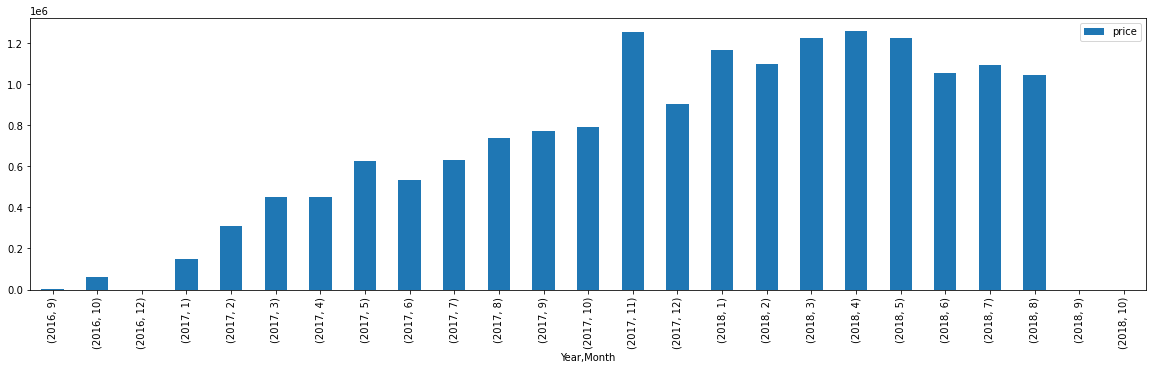

In [93]:
cust_final_df.groupby(['Year','Month'])[['price']].sum().plot(kind='bar',figsize=(20,5))

<AxesSubplot:xlabel='product_category_name'>

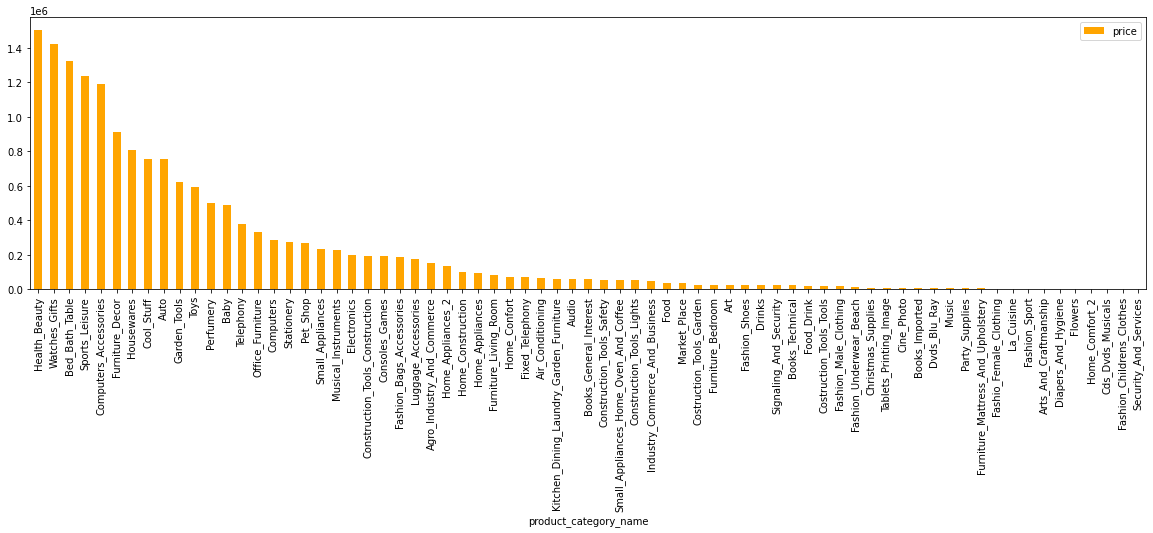

In [92]:
cust_final_df.groupby(['product_category_name'])[["price"]].sum().sort_values(by="price",ascending=False).plot(kind='bar',figsize=(20,5),color='orange')

<AxesSubplot:xlabel='geolocation_state'>

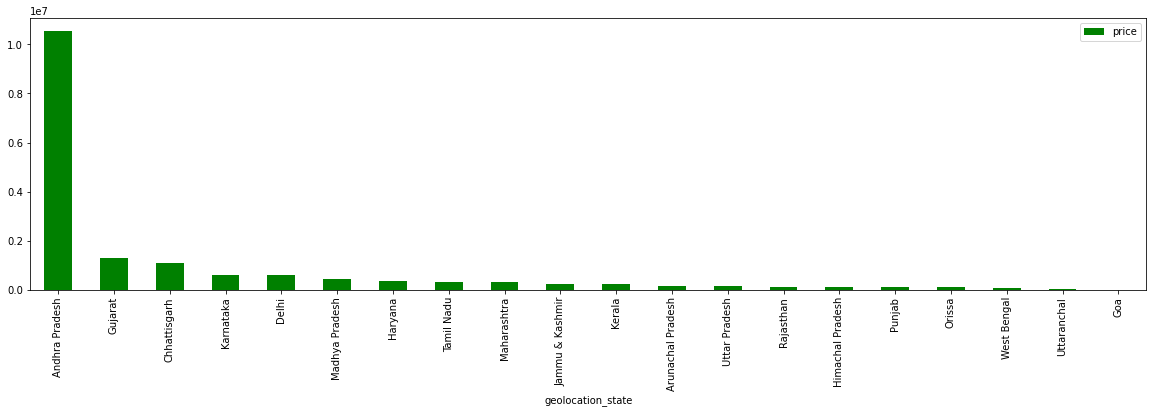

In [91]:
cust_final.groupby(['geolocation_state'])[["price"]].sum().sort_values(by="price",ascending=False).plot(kind='bar',figsize=(20,5),color='green')

<AxesSubplot:xlabel='Month'>

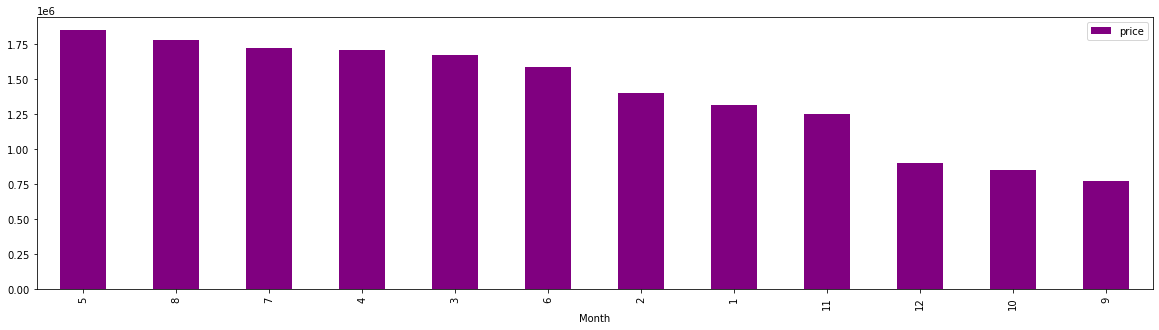

In [90]:
cust_final_df.groupby(['Month'])[["price"]].sum().sort_values(by="price",ascending=False).plot(kind='bar',figsize=(20,5),color='purple')

<AxesSubplot:xlabel='week'>

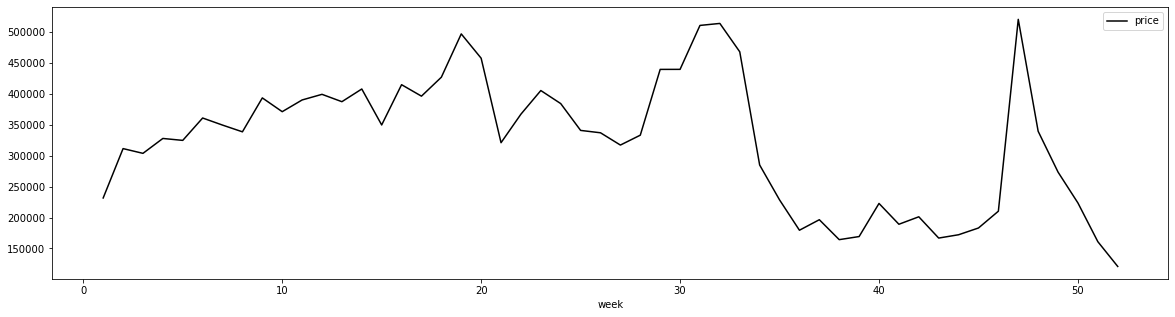

In [89]:
cust_final_df.groupby([cust_final.order_purchase_timestamp.dt.isocalendar().week])[["price"]].sum().plot(kind='line',figsize=(20,5),color='black')

<AxesSubplot:xlabel='day'>

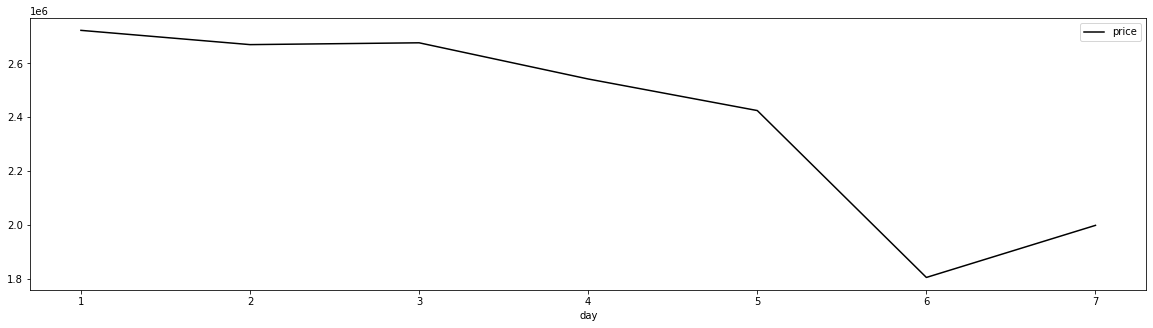

In [88]:
cust_final_df.groupby([cust_final.order_purchase_timestamp.dt.isocalendar().day])[["price"]].sum().plot(kind='line',figsize=(20,5),color='black')

<AxesSubplot:xlabel='payment_type'>

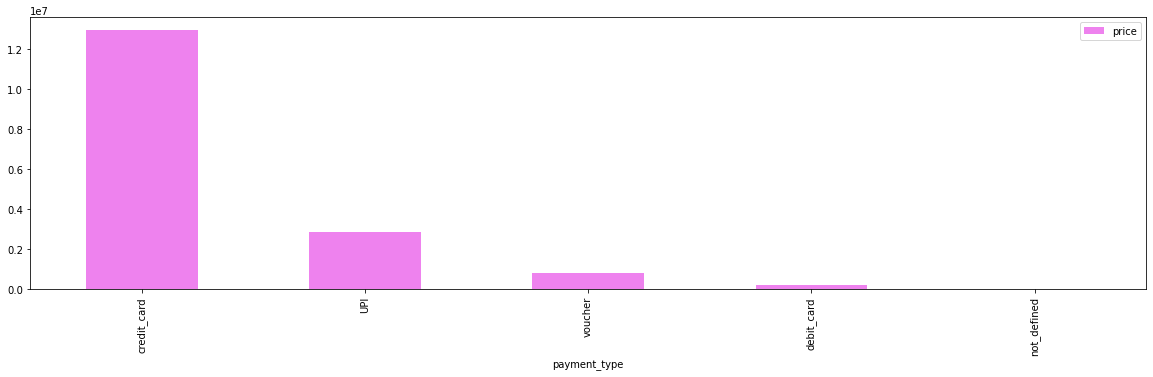

In [87]:
cust_final_df.groupby(['payment_type'])[["price"]].sum().sort_values(by="price",ascending=False).plot(kind='bar',figsize=(20,5),color='violet')

### f. Popular Products by month, seller, state, category

<AxesSubplot:>

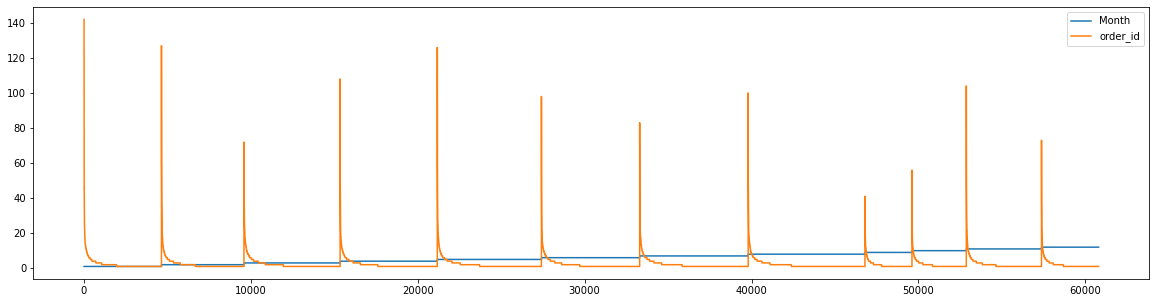

In [106]:
Top_prod_Month = cust_final_df.groupby(['Month','product_id'])[['order_id']].count().sort_values(by=["Month","order_id"],ascending=[True,False]).reset_index()
Top_prod_Month.plot(figsize=(20,5))

<AxesSubplot:xlabel='seller_id_x,product_id'>

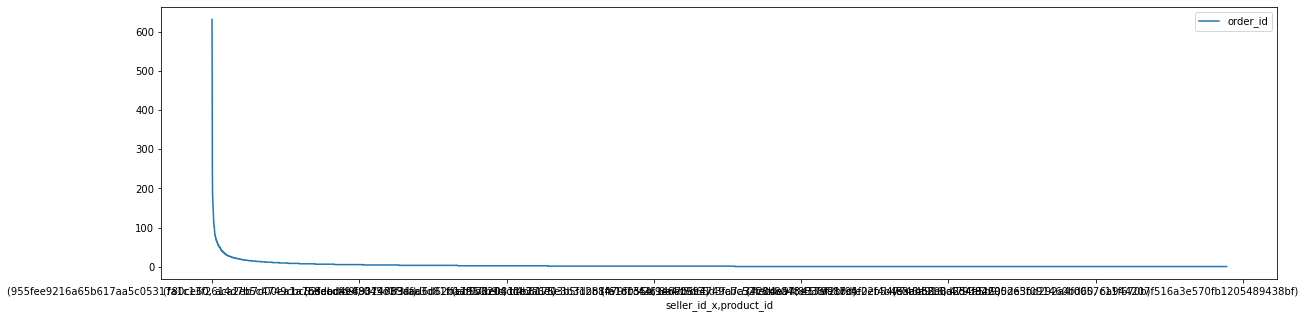

In [107]:
Top_prod_seller = cust_final.groupby(['seller_id_x','product_id'])[['order_id']].count().sort_values(by=['order_id'],ascending=False)
Top_prod_seller.plot(figsize=(20,5))

<AxesSubplot:xlabel='geolocation_state,product_id'>

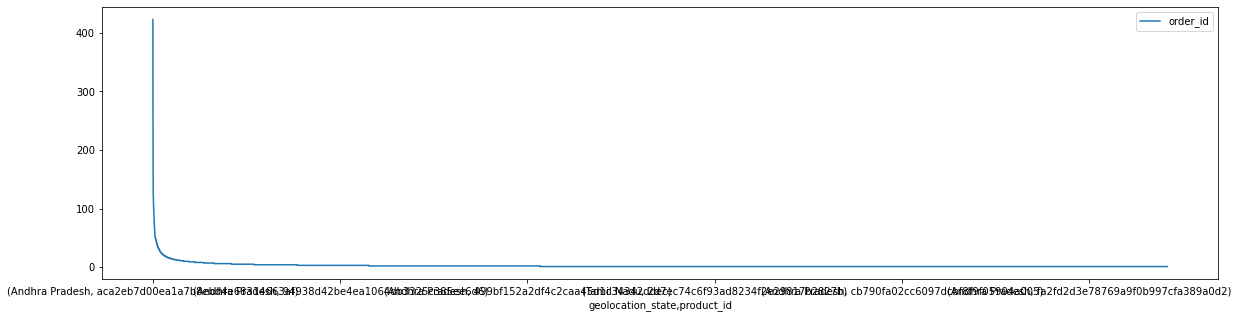

In [112]:
Top_prod_state = cust_final.groupby(['geolocation_state','product_id'])[['order_id']].count().sort_values(by=['order_id'],ascending=False)
Top_prod_state.plot(figsize=(20,5))

<AxesSubplot:xlabel='product_category_name,product_id'>

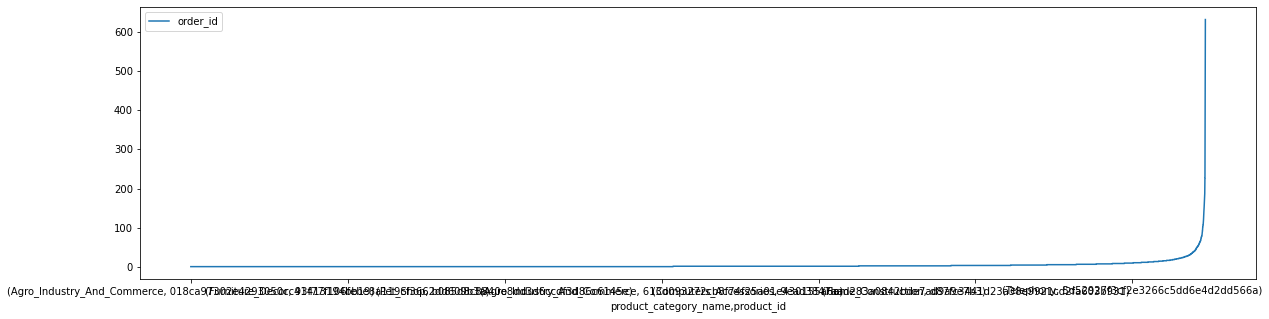

In [116]:
Top_prod_cat = cust_final_df.groupby(['product_category_name','product_id'])[['order_id']].count().sort_values(by=['order_id'],ascending=True)
Top_prod_cat.plot(figsize=(20,5))

### g. Popular categories by state, month


<AxesSubplot:xlabel='geolocation_state,product_category_name'>

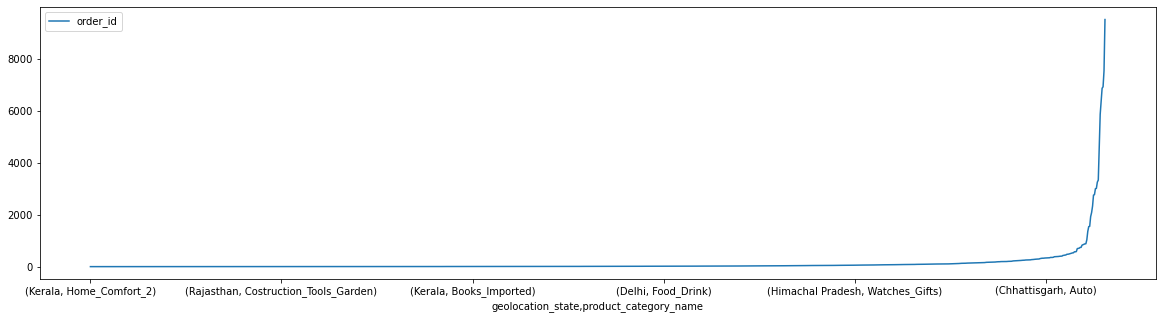

In [121]:
cust_final_df.groupby(['geolocation_state','product_category_name'])[['order_id']].count().sort_values(by=['order_id'],ascending=True).plot(figsize=(20,5))

<AxesSubplot:xlabel='Month,product_category_name'>

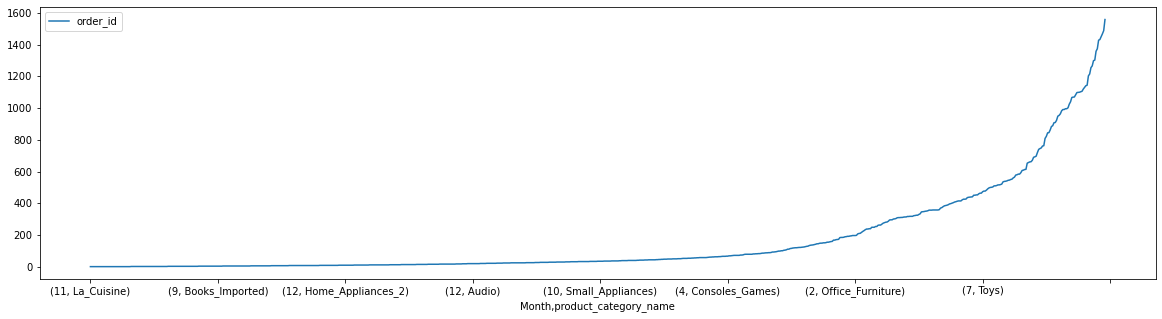

In [115]:
cust_final_df.groupby(['Month','product_category_name'])[['order_id']].count().sort_values(by=['order_id'],ascending=True).plot(figsize=(20,5))

### h. List top 10 most expensive products sorted by price

In [120]:
cust_final_df[['product_id','price']].sort_values(by='price',ascending=False).head(10)

,product_id,price
18996,489ae2aa008f021502940f251d4cce7f,6735.00
29734,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
5531,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
38394,a6492cc69376c469ab6f61d8f44de961,4799.00
17026,c3ed642d592594bb648ff4a04cee2747,4690.00
57402,259037a6a41845e455183f89c5035f18,4590.00
91134,a1beef8f3992dbd4cd8726796aa69c53,4399.87
8294,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
127204,dd113cb02b2af9c8e5787e8f1f0722f6,4059.00
118371,6902c1962dd19d540807d0ab8fade5c6,3999.90


## 2. Performing Customers/sellers Segmentation

### a. Divide the customers into groups based on the revenue generated 

In [123]:
cust_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140141 entries, 0 to 140140
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    140141 non-null  object        
 1   customer_unique_id             140141 non-null  object        
 2   customer_zip_code_prefix       140141 non-null  int64         
 3   customer_city                  140141 non-null  object        
 4   customer_state                 140141 non-null  object        
 5   order_id                       140141 non-null  object        
 6   order_status                   140141 non-null  object        
 7   order_purchase_timestamp       140141 non-null  datetime64[ns]
 8   order_approved_at              139913 non-null  object        
 9   order_delivered_carrier_date   137669 non-null  object        
 10  order_delivered_customer_date  136139 non-null  object        
 11  

In [124]:
Rev_labels = ['low', 'Medium', 'High', 'Outstanding']
cust_final_df['revenues'] = pd.qcut(cust_final.payment_value , q=4, labels=Rev_labels)

Medium         35042
low            35037
Outstanding    35032
High           35027
Name: revenues, dtype: int64


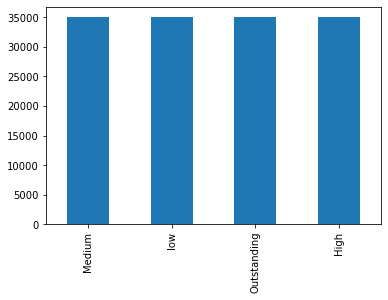

In [128]:
cust_final_df['revenues'].value_counts().plot(kind='bar')
print(cust_final_df['revenues'].value_counts())

### b. Divide the sellers into groups based on the revenue generated 

In [129]:
sellers_new = cust_final_df[['seller_id_y','seller_city','price']]
sellers_new

,seller_id_y,seller_city,price
0,NaN,NaN,124.99
1,NaN,NaN,289.00
2,NaN,NaN,139.94
3,NaN,NaN,149.94
4,8d46553a36e68f95350a200c12f8f2e2,Alwal,230.00
...,...,...,...
140136,8185694b58b2ba6de20fd41ae608bbea,NaN,114.90
140137,NaN,NaN,37.00
140138,091065b789659bc3cd9af9cb3a6253ff,Vepagunta,689.00
140139,353e21e8bf8de2722b4fae1636664b76,Vepagunta,689.00


In [130]:
def missing(x):
    if((x.dtype=='float') or (x.dtype=='int')):
        x = x.fillna(x.median())
    elif ((x.dtype=='object')):
        x = x.fillna(x.mode()[0])
    return x

In [131]:
sellers_new = sellers_new.apply(missing)
sellers_new

,seller_id_y,seller_city,price
0,33ab10be054370c254ddfcf0a6253422,Akkarampalle,124.99
1,33ab10be054370c254ddfcf0a6253422,Akkarampalle,289.00
2,33ab10be054370c254ddfcf0a6253422,Akkarampalle,139.94
3,33ab10be054370c254ddfcf0a6253422,Akkarampalle,149.94
4,8d46553a36e68f95350a200c12f8f2e2,Alwal,230.00
...,...,...,...
140136,8185694b58b2ba6de20fd41ae608bbea,Akkarampalle,114.90
140137,33ab10be054370c254ddfcf0a6253422,Akkarampalle,37.00
140138,091065b789659bc3cd9af9cb3a6253ff,Vepagunta,689.00
140139,353e21e8bf8de2722b4fae1636664b76,Vepagunta,689.00


In [132]:
Price_labels = ['Expensive','Budget_friendly','Cheap']
sellers_new['seller_grouping'] = pd.qcut(sellers_new.price , q=3, labels=Price_labels)

Expensive          47064
Budget_friendly    46951
Cheap              46126
Name: seller_grouping, dtype: int64


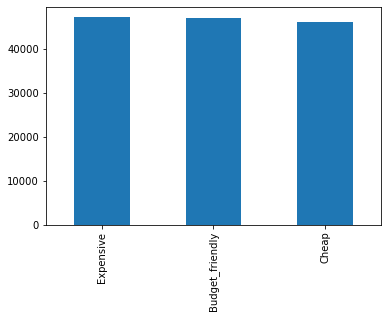

In [134]:
sellers_new['seller_grouping'].value_counts().plot(kind='bar')
print(sellers_new['seller_grouping'].value_counts())

## 3. Cross-Selling (Which products are selling together)

In [136]:
cross_selling_crosstab = cust_final_df.groupby(['order_id']).agg({'product_category_name':list}).assign(Count=lambda x:x['product_category_name'].str.len())
cross_selling_crosstab[cross_selling_crosstab['Count']>1].sort_values(by='Count',ascending=False)

,product_category_name,Count
order_id,,
465c2e1bee4561cb39e0db8c5993aafc,"[Agro_Industry_And_Commerce, Agro_Industry_And...",120
cf287f639abd10b1630574c4a065d4f1,"[Stationery, Stationery, Stationery, Stationer...",108
61edec4c7086a5383dc4f5e6fca69e9b,"[Sports_Leisure, Sports_Leisure, Sports_Leisur...",98
3241baf723e29f140a6ff9082b7f9aca,"[Computers_Accessories, Computers_Accessories,...",98
1b15974a0141d54e36626dca3fdc731a,"[Computers_Accessories, Computers_Accessories,...",80
...,...,...
66eb2e45baf0a88a06f8d17a1e756ff6,"[Furniture_Decor, Furniture_Decor]",2
66ece7c73f4550ac89c08ffa53e85dc2,"[Health_Beauty, Health_Beauty]",2
66ed65fb801b44984e7a79b2d0496772,"[Musical_Instruments, Musical_Instruments]",2


## 4. Payment Behaviour
### a. How customers are paying?

credit_card    102746
UPI             27695
voucher          7682
debit_card       2012
not_defined         3
Name: payment_type, dtype: int64


<AxesSubplot:>

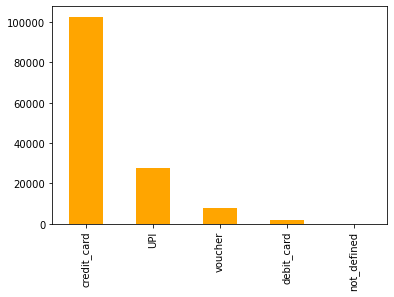

In [139]:
print(cust_final.payment_type.value_counts())
cust_final.payment_type.value_counts().plot(kind='bar',color='orange')

### b. Which payment channels are used by most customers?

In [140]:
print(cust_final.groupby(['payment_type'])[['payment_type']].count().head(1))

              payment_type
payment_type              
UPI                  27695


## 5. Customer satisfaction towards category & product
### a. Which categories (top 10) are maximum rated & minimum rated?


                                       review_score
product_category_name                              
Books_Imported                             4.664000
Cds_Dvds_Musicals                          4.600000
Fashion_Childrens_Clothes                  4.500000
Small_Appliances_Home_Oven_And_Coffee      4.450000
Books_General_Interest                     4.444126
Costruction_Tools_Tools                    4.416000
Food_Drink                                 4.398230
Books_Technical                            4.388704
Cine_Photo                                 4.336957
Flowers                                    4.333333


<AxesSubplot:xlabel='product_category_name'>

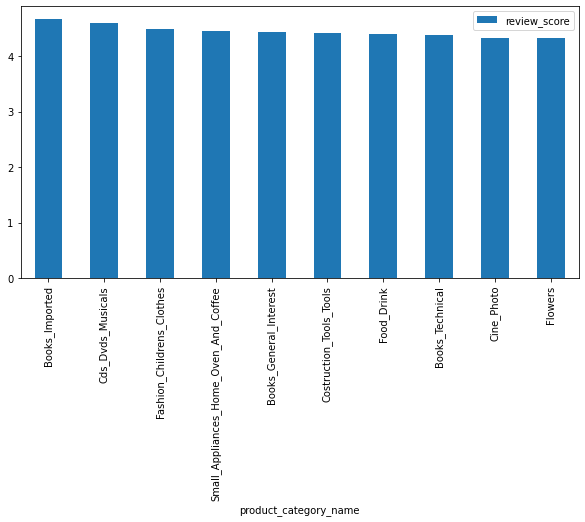

In [153]:
print(cust_final_df.groupby(['product_category_name'])[['review_score']].mean().sort_values(by='review_score',ascending=False).head(10))
cust_final_df.groupby(['product_category_name'])[['review_score']].mean().sort_values(by='review_score',ascending=False).head(10).plot(kind='bar',figsize=(10,5))

                                   review_score
product_category_name                          
Furniture_Mattress_And_Upholstery      3.800000
Furniture_Living_Room                  3.763754
Fixed_Telephony                        3.723473
Fashio_Female_Clothing                 3.696429
Office_Furniture                       3.534851
La_Cuisine                             3.500000
Fashion_Male_Clothing                  3.469565
Diapers_And_Hygiene                    3.304348
Home_Comfort_2                         3.300000
Security_And_Services                  2.500000


<AxesSubplot:xlabel='product_category_name'>

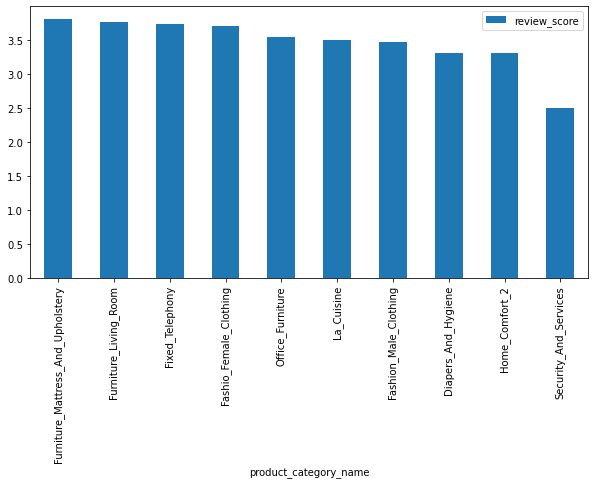

In [152]:
print(cust_final_df.groupby(['product_category_name'])[['review_score']].mean().sort_values(by='review_score',ascending=False).tail(10))
cust_final_df.groupby(['product_category_name'])[['review_score']].mean().sort_values(by='review_score',ascending=False).tail(10).plot(kind='bar',figsize=(10,5))

### b. Which products (top10) are maximum rated & minimum rated?

In [146]:
cust_final_df.groupby(['product_id'])[['review_score']].mean().sort_values(by='review_score',ascending=False).head(10)

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
86743ff92eee3d16b7df59cddd583b8c,5.0
868ceb027ab706a4dee42e2220006b85,5.0
868969d3a93aeeab7bfcd4fc3d3d65de,5.0
868766ed2172644fdd977d6bd395a107,5.0
8684bd8f93b4f4038d07188a23811e93,5.0
867c96d2bb67aba6500a4c509cf76072,5.0
867b820367ec206b38a357f2c12454b7,5.0
867901d7e8488fb97f1fb538c09d476e,5.0


In [147]:
cust_final_df.groupby(['product_id'])[['review_score']].mean().sort_values(by='review_score',ascending=False).tail(10)

,review_score
product_id,
37c599910c4de68c0bf1af0c6428ab1c,1.0
856af50654f3ba4a223ae9b5b8d243c0,1.0
eae50b5c9a18c296b7fa904cf04406a5,1.0
7933eeb8cf79ae899bfac71c0edb076d,1.0
10a3a969b9e7d03b0dc2384ebbcad6ef,1.0
10a6596b3224c408ee46c8aaaa2977cd,1.0
602bd303d85e0e535a0767b9f1d85f91,1.0
859c4a81490e9402bac13f62672482d1,1.0
093cd981b714bcdff182b427d87fc8fc,1.0


### c. Average rating by location, seller, product, category, month.

                   review_score
geolocation_state              
Andhra Pradesh         3.983317
Arunachal Pradesh      4.008766
Chhattisgarh           4.020367
Delhi                  4.035018
Goa                    4.777778
Gujarat                4.066957
Haryana                4.103113
Himachal Pradesh       3.928144
Jammu & Kashmir        4.031646
Karnataka              4.011113
Kerala                 4.031250
Madhya Pradesh         3.980731
Maharashtra            4.075871
Orissa                 4.088589
Punjab                 4.154211
Rajasthan              4.148678
Tamil Nadu             4.103523
Uttar Pradesh          4.110911
Uttaranchal            3.669811
West Bengal            3.938303


<AxesSubplot:xlabel='geolocation_state'>

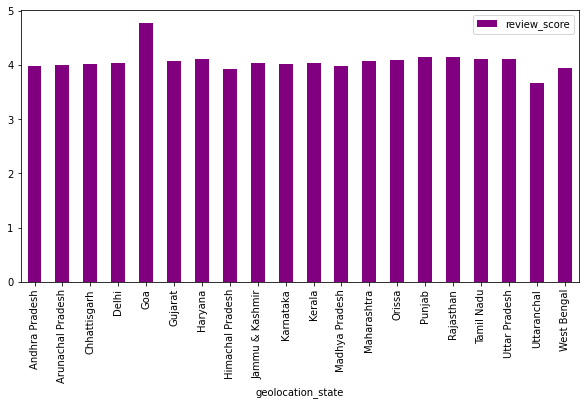

In [151]:
print(cust_final_df.groupby(['geolocation_state'])[['review_score']].mean())
cust_final_df.groupby(['geolocation_state'])[['review_score']].mean().plot(kind='bar',color='purple',figsize=(10,5))

In [154]:
cust_final_df.groupby(['seller_id_x'])[['review_score']].mean().sort_values(by='review_score',ascending=False)

,review_score
seller_id_x,
32e5635e63cb374eb63afdd242fb6134,5.0
41958cbd3335433c8740300e8cd600d5,5.0
d7827b2af99326a03b0ed9c7a24db0d3,5.0
eb1bf309f4f6af9a97e9ddac3fdbeabe,5.0
a56a8043ebf66e42119618fb8cf232c6,5.0
...,...
1444c08e64d55fb3c25f0f09c07ffcf2,1.0
ad738d3fcf42655ed15c4960b7b6c601,1.0
e46bc031f2c5bae4ccb40bb90712e9b4,1.0


In [155]:
cust_final_df.groupby(['product_id'])[['review_score']].mean().sort_values(by='review_score',ascending=False)

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
86743ff92eee3d16b7df59cddd583b8c,5.0
868ceb027ab706a4dee42e2220006b85,5.0
868969d3a93aeeab7bfcd4fc3d3d65de,5.0
868766ed2172644fdd977d6bd395a107,5.0
...,...
10a6596b3224c408ee46c8aaaa2977cd,1.0
602bd303d85e0e535a0767b9f1d85f91,1.0
859c4a81490e9402bac13f62672482d1,1.0


In [157]:
cust_final_df.groupby(['product_category_name'])[['review_score']].mean().sort_values(by='review_score',ascending=False)

,review_score
product_category_name,
Books_Imported,4.664000
Cds_Dvds_Musicals,4.600000
Fashion_Childrens_Clothes,4.500000
Small_Appliances_Home_Oven_And_Coffee,4.450000
Books_General_Interest,4.444126
...,...
La_Cuisine,3.500000
Fashion_Male_Clothing,3.469565
Diapers_And_Hygiene,3.304348


       review_score
Month              
1          3.934677
2          3.755536
3          3.776608
4          4.049521
5          4.106060
6          4.147448
7          4.162123
8          4.205031
9          4.090425
10         3.970492
11         3.825431
12         3.941055


<AxesSubplot:xlabel='Month'>

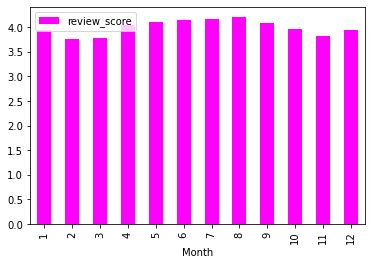

In [159]:
print(cust_final_df.groupby(['Month'])[['review_score']].mean())
cust_final_df.groupby(['Month'])[['review_score']].mean().plot(kind='bar',color='magenta')